# Importing required laibraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('compressed_data.csv')


C:\Users\Dell\AppData\Local\Temp\ipykernel_6336\284346898.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('compressed_data.csv')


In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [5]:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

## as last review is in object format so making it in proper date format

In [7]:
df['last review']=pd.to_datetime(df['last review'],errors='coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

# Dealing with missing valus in data

In [9]:
df.fillna({'reviews per month':0,'last review':df['last review'].min()},inplace=True)

In [10]:
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                            0
reviews per month                      0
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

## Droping unwanted missing values and unwanted columns

In [11]:
df.dropna(subset=['NAME','host name'],inplace=True)

In [12]:
df=df.drop(columns=['house_rules','license'],errors='ignore')

In [13]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,$966,$193,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,$142,$28,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,$620,$124,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,$204,$41,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,$577,$115,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,2003.0,$844,$169,1.0,0.0,2012-07-11,0.00,3.0,1.0,227.0
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,2016.0,$837,$167,1.0,1.0,2015-07-06,0.02,2.0,2.0,395.0
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,2009.0,$988,$198,3.0,0.0,2012-07-11,0.00,5.0,1.0,342.0
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,2015.0,$546,$109,2.0,5.0,2015-10-11,0.10,3.0,1.0,386.0


In [14]:
df['price']=df['price'].replace('[\$,]','',regex=True).astype('float')
df['service fee']=df['service fee'].replace(['\$.'],'',regex=True).astype('float')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Dell\AppData\Local\Temp\ipykernel_6336\964518687.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price']=df['price'].replace('[\$,]','',regex=True).astype('float')
C:\Users\Dell\AppData\Local\Temp\ipykernel_6336\964518687.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['service fee']=df['service fee'].replace(['\$.'],'',regex=True).astype('float')


In [15]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,93.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,8.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,24.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,1.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,15.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.014100e+05,1.014100e+05,101402.000000,101402.000000,101210.000000,101171.000000,101142.000000,101016.000000,101228.000000,101410,101410.000000,101103.000000,101092.000000,100990.000000
mean,2.920959e+07,4.926155e+10,40.728082,-73.949663,2012.486908,625.381008,26.672896,8.113744,27.511854,2018-05-15 21:26:08.721033728,1.163207,3.278558,7.948463,141.164660
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,0.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.000000,1.000000,1.000000,-10.000000
25%,1.507574e+07,2.459183e+10,40.688730,-73.982570,2007.000000,340.000000,5.000000,2.000000,1.000000,2017-07-30 00:00:00,0.090000,2.000000,1.000000,3.000000
50%,2.922911e+07,4.912069e+10,40.722300,-73.954440,2012.000000,625.000000,12.000000,3.000000,7.000000,2019-05-23 00:00:00,0.480000,3.000000,1.000000,96.000000
75%,4.328308e+07,7.399747e+10,40.762750,-73.932340,2017.000000,913.000000,42.000000,5.000000,31.000000,2019-07-01 00:00:00,1.710000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,99.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.626820e+07,2.853703e+10,0.055850,0.049474,5.765130,331.609111,28.515907,30.378014,49.549258,NaN,1.683708,1.285369,32.328974,135.419199


## Questions and visualization

### 1.what is the distribution of listing price

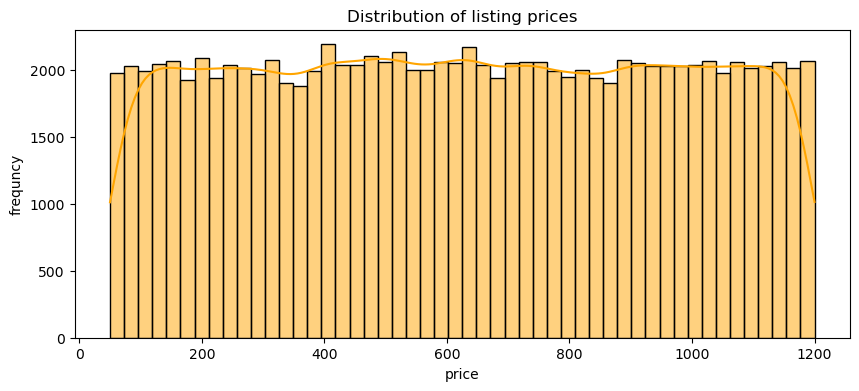

In [20]:
plt.figure(figsize=(10,4))
sns.histplot(data=df['price'],bins=50,kde=True,color='orange')
plt.title('Distribution of listing prices')
plt.xlabel('price')
plt.ylabel('frequncy')
plt.show()

In [21]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,93.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,8.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,24.0,3.0,0.0,2012-07-11,0.00,5.0,1.0,352.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,1.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013.0,577.0,15.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0


### 2.How are different rooms are distributed

In [23]:
df['room type'].value_counts()

room type
Entire home/apt    53132
Private room       45967
Shared room         2196
Hotel room           115
Name: count, dtype: int64

Text(0.5, 1.0, 'Room type distribution')

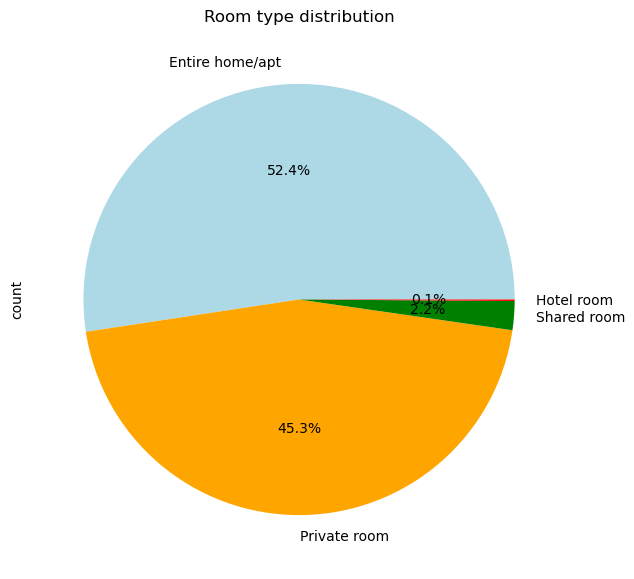

In [24]:
df['room type'].value_counts().plot(kind='pie',autopct='%1.1f%%', figsize=(7, 7), colors=['lightblue', 'orange', 'green', 'red'])
plt.title('Room type distribution')

### 3.How listing are distributed accross different neighbourhoods

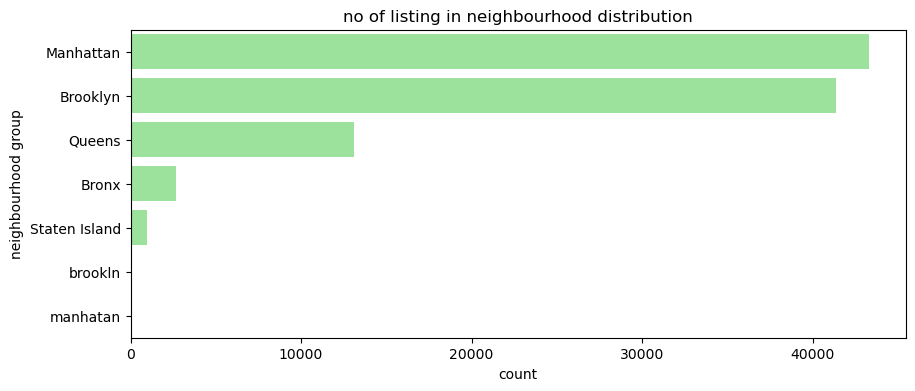

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(y='neighbourhood group',data=df,color='lightgreen',order=df['neighbourhood group'].value_counts().index)
plt.title('no of listing in neighbourhood distribution')
plt.show()

## 4.what is the relation between roomtype and price

C:\Users\Dell\AppData\Local\Temp\ipykernel_6336\2805661782.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='room type')


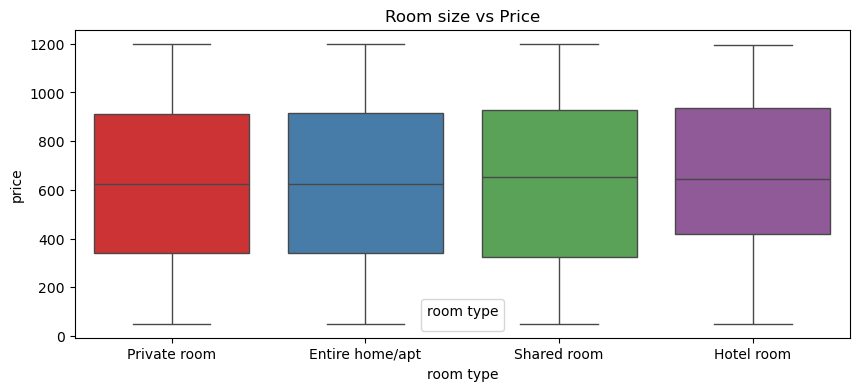

In [63]:
plt.figure(figsize=(10,4))
sns.boxplot(x='room type',y='price',hue='room type',data=df,palette='Set1')
plt.title('Room size vs Price')
plt.xlabel('room type')
plt.ylabel('price')
plt.legend(title='room type')
plt.show()

## 5. how the number of reviews change with time

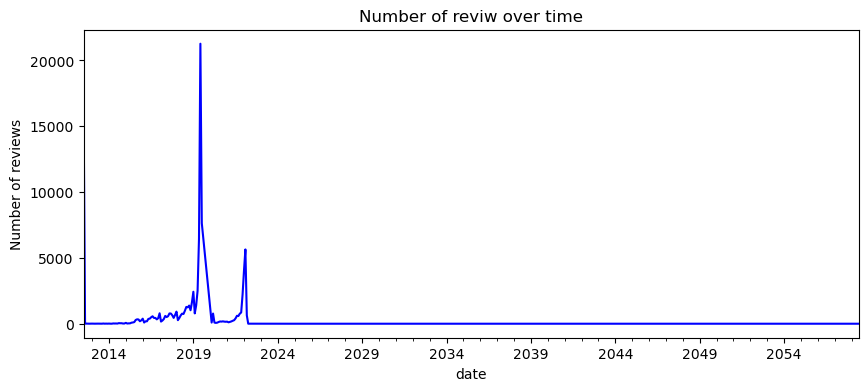

In [84]:
review_over_time1=df.groupby(df['last review'].dt.month).size()
plt.figure(figsize=(10,4))
review_over_time.plot(kind='line',color='blue')
plt.title('Number of reviw over time')
plt.xlabel('date')
plt.ylabel('Number of reviews')
plt.show()